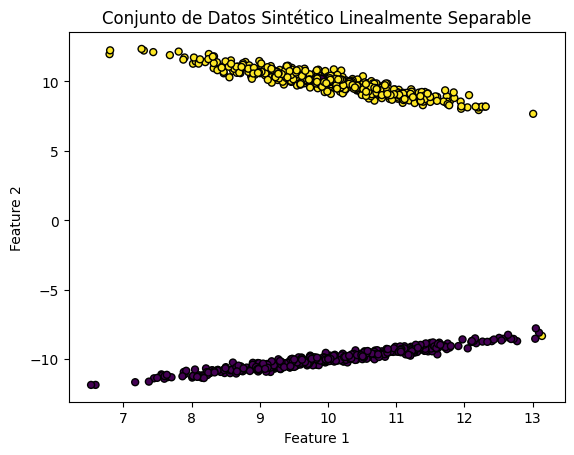

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Crear un conjunto de datos sintético linealmente separable
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=10, random_state=42)

# Visualizar el conjunto de datos
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Conjunto de Datos Sintético Linealmente Separable')
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_15772\2523957997.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=25, edgecolor='k', cmap=plt.cm.get_cmap('viridis', 5))


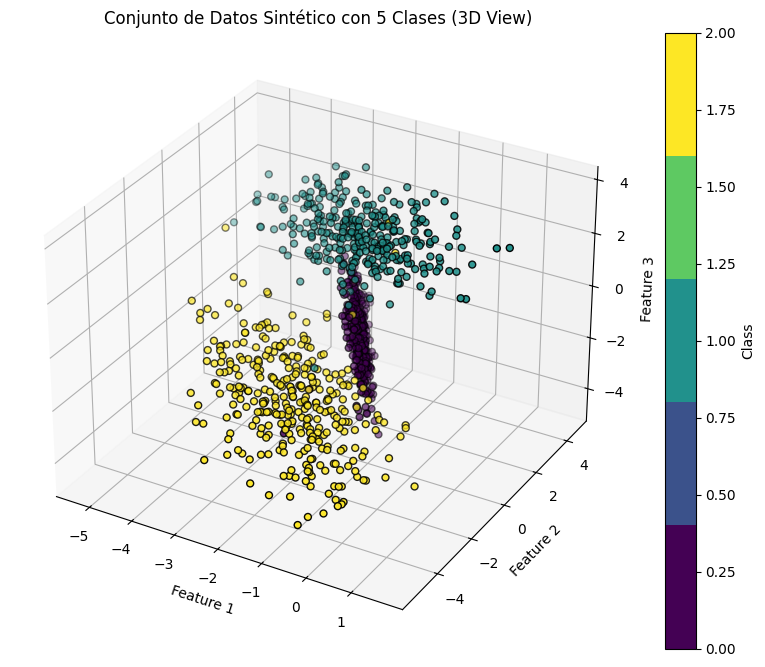

In [16]:
# Crear un conjunto de datos sintético con 5 clases linealmente separables
X, y = make_classification(n_samples=1000, n_features=3, n_redundant=0, 
                           n_informative=3, n_clusters_per_class=1, 
                           n_classes=3, class_sep=2, random_state=42)

from mpl_toolkits.mplot3d import Axes3D

# Crear un gráfico 3D para visualizar las tres características
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot usando las tres características
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=25, edgecolor='k', cmap=plt.cm.get_cmap('viridis', 5))

# Añadiendo etiquetas y título
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.title('Conjunto de Datos Sintético con 5 Clases (3D View)')

# Añadiendo una barra de colores para las clases
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Class')

plt.show()


In [30]:
import numpy as np
from sklearn.metrics import accuracy_score

def linear_clasifier_readout(X_train, y_train, X_test, y_test, num_samples_test , num_samples_train, num_intervals ,num_labels,num_features):
    # Repetimos las etiquetas one-hot para cada intervalo
    
    # Transponemos y_train
    y_train_transposed = y_train.T

    # Usamos np.tile para repetir la matriz transpuesta
    Y_hat_repeated = np.tile(y_train_transposed, (1, num_intervals))

    # Redimensionamos X_train a una forma que separe las muestras, los intervalos y las características
    X_train_intermediate = X_train.reshape(num_samples_train, num_features, num_intervals)

    # Reorganizamos la matriz a la forma deseada [(num_samples * num_intervals), num_features]
    S = X_train_intermediate.reshape(num_samples_train * num_intervals, num_features)

    # Calculamos la pseudoinversa de la salida aplanada del reservorio
    S_moore = np.linalg.pinv(S).T

    # Calculamos los pesos
    Weights = Y_hat_repeated @ S_moore



    # Aplicamos los pesos al conjunto de prueba

    # Reorganizar X_test a la forma (300, 13, 36)
    X_test_reshaped = X_test.reshape(num_samples_test, num_features, num_intervals)

    # Inicializar una matriz para guardar los resultados
    # Cada muestra tendrá un resultado por intervalo, así que la forma será (300, 36, 10)
    results_test_raw = np.zeros((num_samples_test, num_intervals, Weights.shape[0]))

    # Aplicar la matriz de pesos a cada intervalo
    for i in range(num_intervals):
        interval_features = X_test_reshaped[:, :, i]  # Extraer las características de cada intervalo
        results_test_raw[:, i, :] = interval_features @ Weights.T  # Aplicar los pesos

    # Calculando el promedio a lo largo del eje de los intervalos
    # La forma de results_promedio será (num_samples_test, num_classes)
    results_test_promedio = np.mean(results_test_raw, axis=1)


    # Elegir la clase con el valor más alto para cada muestra
    # La forma de y_pred será (num_samples_test,)
    y_test_pred = np.argmax(results_test_promedio, axis=1)


    # y_pred contiene ahora las clases predichas para cada muestra


    # Aplicamos los pesos al conjunto de entrenamiento


        # Reorganizar X_test a la forma (300, 36, 13)
    X_train_reshaped = X_train.reshape(num_samples_train, num_features, num_intervals)

    # Inicializar una matriz para guardar los resultados
    # Cada muestra tendrá un resultado por intervalo, así que la forma será (300, 36, 10)
    results_train_raw = np.zeros((num_samples_train, num_intervals, Weights.shape[0]))

    # Aplicar la matriz de pesos a cada intervalo
    for i in range(num_intervals):
        interval_features = X_train_reshaped[:, :, i]  # Extraer las características de cada intervalo
        results_train_raw[:, i, :] = interval_features @ Weights.T  # Aplicar los pesos

    # Calculando el promedio a lo largo del eje de los intervalos
    # La forma de results_promedio será (num_samples_test, num_classes)
    results_train_promedio = np.mean(results_train_raw, axis=1)


    # Elegir la clase con el valor más alto para cada muestra
    # La forma de y_pred será (num_samples_train,)
    y_train_pred = np.argmax(results_train_promedio, axis=1)




    # Convertimos las etiquetas verdaderas one-hot en índices de clase
    y_test_true_indices = np.argmax(y_test, axis=1)
    y_train_true_indices = np.argmax(y_train, axis=1)

    # Calculamos la precisión
    accuracy_test = accuracy_score(y_test_true_indices, y_test_pred)
    accuracy_train = accuracy_score(y_train_true_indices, y_train_pred)

    # Imprimimos los resultados
    print('Shapes:')
    print('y_train Shape :', y_train.shape)
    print("Y_hat_repeated shape:", Y_hat_repeated.shape)
    print("Forma de la matriz S:", S.shape)
    print("Pseudo inverse shape :",S_moore.shape)
    print('Weights matrix shape', Weights.shape)
    print('Shapes for Test Set :')
    print("X_test content shape:",X_test_reshaped.shape)
    print("Test Prediction Raw Results Shape",results_test_raw.shape)
    print("Mean Results shape:",results_test_promedio.shape)


    print(f'Accuracy en el conjunto de prueba: {accuracy_test*100:.2f} %')
    print(f'Accuracy en el conjunto de train: {accuracy_train*100:.2f} %')

    print('Predicted Test Labels:')
    print(y_test_pred)
    print('True Test Labels:')
    print(y_test_true_indices)

    print('Predicted train Labels:')
    print(y_train_pred[:30])
    print('True train Labels:')
    print(y_train_true_indices[:30])


    print("y_test prediction results:")
    print("resultados de la prediccion de cada intervalo")
    #print(results_test_raw)


    print("resultados del promedio")
    #print(results_test_promedio)
    print("matriz de pesos")
    print(Weights)
    
    return Weights


#    return {
#        'accuracy_test': accuracy_test,
#        'accuracy_train': accuracy_train,
#        'y_test_pred': y_test_pred,
#        'y_train_pred': y_train_pred,
#        'Weights': Weights
#    }



In [31]:
from sklearn.preprocessing import OneHotEncoder

# Número de clases en el conjunto de datos sintético
num_classes = 3

# Convertir las etiquetas a formato one-hot
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Parámetros para la función de entrenamiento
num_samples_train = len(X)  # Número de muestras
num_intervals = 1  # Cada muestra es un intervalo en este caso
num_features = X.shape[1]  # Número de características

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)

# Llamar a la función de entrenamiento
Weights = linear_clasifier_readout(X_train, y_train, X_test, y_test, 
                                  num_samples_test=len(X_test), 
                                  num_samples_train=len(X_train), 
                                  num_intervals=num_intervals,
                                  num_labels=num_classes,
                                  num_features=num_features)

# Imprimir los Weightsados
print(Weights)


Shapes:
y_train Shape : (700, 3)
Y_hat_repeated shape: (3, 700)
Forma de la matriz S: (700, 3)
Pseudo inverse shape : (700, 3)
Weights matrix shape (3, 3)
Shapes for Test Set :
X_test content shape: (300, 3, 1)
Test Prediction Raw Results Shape (300, 1, 3)
Mean Results shape: (300, 3)
Accuracy en el conjunto de prueba: 97.00 %
Accuracy en el conjunto de train: 97.71 %
Predicted Test Labels:
[2 0 1 1 2 2 0 0 1 1 1 0 1 2 2 0 0 1 2 1 1 1 0 2 1 1 2 1 1 0 2 0 2 1 2 0 2
 0 1 1 0 2 1 0 2 2 1 1 0 0 0 1 0 0 1 1 2 1 0 0 2 2 0 2 0 0 0 0 0 2 0 0 2 0
 1 1 1 2 2 1 0 1 2 0 0 2 2 2 2 1 0 1 2 0 2 1 0 0 2 1 1 0 2 2 2 1 0 0 1 0 2
 0 2 0 2 2 2 2 0 0 1 1 0 0 2 1 2 0 1 2 2 0 2 0 2 1 0 0 0 0 1 0 1 1 2 1 0 0
 1 2 2 1 1 2 2 0 2 1 2 2 0 2 1 0 0 1 1 1 2 1 0 1 2 2 1 2 2 1 0 1 2 2 1 1 2
 2 0 2 2 2 0 1 1 0 1 1 0 0 0 2 0 0 1 2 1 1 1 1 2 2 2 1 2 2 1 2 1 2 1 2 1 0
 2 2 0 1 2 1 0 2 2 2 1 2 0 2 1 1 1 1 0 0 0 0 2 2 2 0 0 0 2 2 1 2 2 2 0 1 0
 1 1 1 0 2 2 0 2 1 2 1 2 2 1 1 2 2 1 0 2 2 0 2 0 1 2 1 2 2 1 2 0 2 0 1 0 1
 1 0 1

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


C:\Users\david\AppData\Local\Temp\ipykernel_15772\2527375900.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=25, edgecolor='k', cmap=plt.cm.get_cmap('viridis', 5))


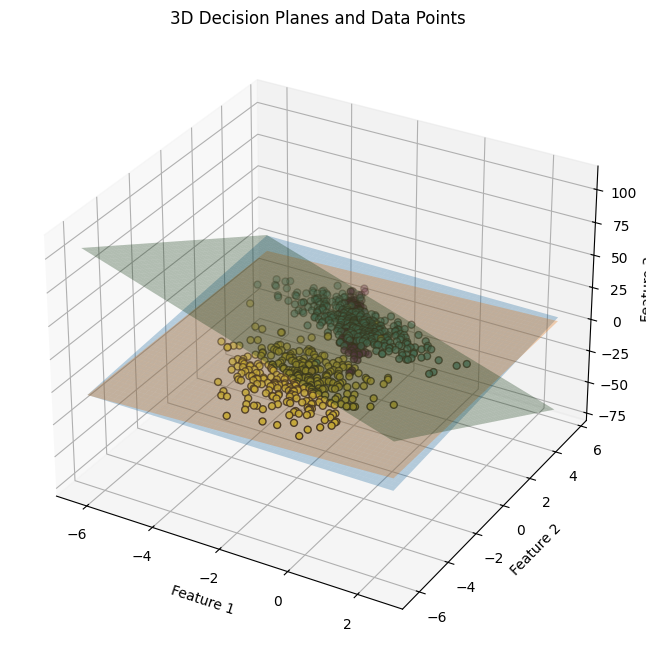

: 

In [32]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_decision_boundaries(X, y, Weights):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plotear los datos
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, s=25, edgecolor='k', cmap=plt.cm.get_cmap('viridis', 5))

    # Crear una malla para cubrir el espacio de las características
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

    # Plotear cada plano de decisión
    for w in Weights:
        # Calculamos la ecuación del plano z = ax + by + c
        z = -(w[0] * xx + w[1] * yy) / w[2]
        ax.plot_surface(xx, yy, z, alpha=0.3)

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title('3D Decision Planes and Data Points')
    plt.show()

# Suponiendo que 'X' es tu conjunto de datos y 'y' son las etiquetas
plot_3d_decision_boundaries(X, y, Weights)
